In [2]:
# libraries
from dotenv import load_dotenv
import os
from tavily import TavilyClient

# load environment variables from .env file
_ = load_dotenv()

# connect
client = TavilyClient(api_key=os.environ.get("TAVILY_API_KEY"))

In [3]:
# run search
result = client.search("What is in Nvidia's new Blackwell GPU?",
                       include_answer=True)

# print the answer
result["answer"]


'The Nvidia Blackwell GPU features a dual-die design with 104 billion transistors, enhanced NVLink interconnect, and second-generation Transformer Engine for AI.'

In [5]:
# choose location (try to change to your own city!)

city = "San Francisco"

query = f"""
    what is the current weather in {city}?
    Should I travel there today?
    "weather.com"
"""

> Note: search was modified to return expected results in the event of an exception. High volumes of student traffic sometimes cause rate limit exceptions.

In [6]:
import requests
from bs4 import BeautifulSoup
from duckduckgo_search import DDGS
import re

ddg = DDGS()

def search(query, max_results=6):
    try:
        results = ddg.text(query, max_results=max_results)
        return [i["href"] for i in results]
    except Exception as e:
        print(f"returning previous results due to exception reaching ddg.")
        results = [ # cover case where DDG rate limits due to high deeplearning.ai volume
            "https://weather.com/weather/today/l/USCA0987:1:US",
            "https://weather.com/weather/hourbyhour/l/54f9d8baac32496f6b5497b4bf7a277c3e2e6cc5625de69680e6169e7e38e9a8",
        ]
        return results  


for i in search(query):
    print(i)

/tmp/ipykernel_9871/2852339428.py:6: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  ddg = DDGS()


https://www.current-news.co.uk/reports/the-ev-infrastructure-report/
https://www.current-news.co.uk/a-key-delivery-year-elexon-on-delivering-electricity-flexibility-in-2025/
https://www.current-news.co.uk/octopus-energy-dethrones-british-gas-to-become-biggest-gb-energy-supplier/
https://www.current-news.co.uk/ofgem-approves-nesos-grid-connection-reforms/
https://www.current-news.co.uk/neso-submits-final-connections-reform-proposal-to-ofgem/
https://zhidao.baidu.com/question/434865041797516004.html


In [7]:
def scrape_weather_info(url):
    """Scrape content from the given URL"""
    if not url:
        return "Weather information could not be found."
    
    # fetch data
    headers = {'User-Agent': 'Mozilla/5.0'}
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        return "Failed to retrieve the webpage."

    # parse result
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup


> Note: This produces a long output, you may want to right click and clear the cell output after you look at it briefly to avoid scrolling past it.

Website: https://www.current-news.co.uk/reports/the-ev-infrastructure-report/


<body class="brand-evinfrastructurenews" data-version="2.50.0"><noscript><iframe height="0" src="https://www.googletagmanager.com/ns.html?id=GTM-WH8BGZQ" style="display:none;visibility:hidden" title="gtm noscript 0" width="0"></iframe><iframe height="0" src="https://www.googletagmanager.com/ns.html?id=GTM-5K38R9W7" style="display:none;visibility:hidden" title="gtm noscript 1" width="0"></iframe></noscript><div id="fb-root"></div><main class="Provider" data-theme="theme1"><div id="bigsky_v"></div><div class="ads ad adsbox doubleclick ad-placement carbon-ads" data-testid="ad_blocker" style="top:0;left:0;height:1px;width:1px;position:absolute"></div><div class="Layout" data-template="layout"><nav aria-label="navigation" class="Navigation" data-module="navigation"><div class="Navigation-HeaderWrapper" data-testid="header"><div class="FullScreenBackground Navigation-HeaderBackground"></div><div class="Navigation
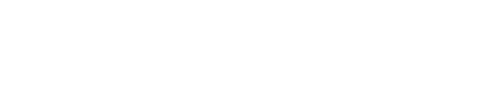

In [8]:
# use DuckDuckGo to find websites and take the first result
url = search(query)[0]

# scrape first wesbsite
soup = scrape_weather_info(url)

print(f"Website: {url}\n\n")
print(str(soup.body)[:50000]) # limit long outputs

In [9]:
# extract text
weather_data = []
for tag in soup.find_all(['h1', 'h2', 'h3', 'p']):
    text = tag.get_text(" ", strip=True)
    weather_data.append(text)

# combine all elements into a single string
weather_data = "\n".join(weather_data)

# remove all spaces from the combined text
weather_data = re.sub(r'\s+', ' ', weather_data)
    
print(f"Website: {url}\n\n")
print(weather_data)

Website: https://www.current-news.co.uk/reports/the-ev-infrastructure-report/


The 2024 EV Infrastructure Report The 2024 EV Infrastructure Report The 2024 EV Infrastructure Report The second edition of the EV Infrastructure Report offers a detailed look into the key developments and challenges within the EV industry. With the UK’s readiness to support the transition to zero-emission vehicles still uncertain, the EV market continues to expand. However, despite this progress, concerns remain over the delay of the ZEV mandate to 2035. The second edition of the EV Infrastructure Report offers a detailed look into the key developments and challenges within the EV industry. With the UK’s readiness to support the transition to zero-emission vehicles still uncertain, the EV market continues to expand. However, despite this progress, concerns remain over the delay of the ZEV mandate to 2035. October 14, 2024 Download Ready Click below to begin your download. The second edition of the EV Infra

In [10]:
# run search
result = client.search(query, max_results=1)

# print first result
data = result["results"][0]["content"]

print(data)

{'location': {'name': 'San Francisco', 'region': 'California', 'country': 'United States of America', 'lat': 37.775, 'lon': -122.4183, 'tz_id': 'America/Los_Angeles', 'localtime_epoch': 1753841120, 'localtime': '2025-07-29 19:05'}, 'current': {'last_updated_epoch': 1753840800, 'last_updated': '2025-07-29 19:00', 'temp_c': 17.8, 'temp_f': 64.0, 'is_day': 1, 'condition': {'text': 'Partly cloudy', 'icon': '//cdn.weatherapi.com/weather/64x64/day/116.png', 'code': 1003}, 'wind_mph': 13.4, 'wind_kph': 21.6, 'wind_degree': 262, 'wind_dir': 'W', 'pressure_mb': 1018.0, 'pressure_in': 30.06, 'precip_mm': 0.0, 'precip_in': 0.0, 'humidity': 75, 'cloud': 75, 'feelslike_c': 17.8, 'feelslike_f': 64.0, 'windchill_c': 13.9, 'windchill_f': 57.0, 'heatindex_c': 14.7, 'heatindex_f': 58.4, 'dewpoint_c': 13.7, 'dewpoint_f': 56.7, 'vis_km': 16.0, 'vis_miles': 9.0, 'uv': 0.4, 'gust_mph': 18.3, 'gust_kph': 29.5}}


In [11]:
import json
from pygments import highlight, lexers, formatters

# parse JSON
parsed_json = json.loads(data.replace("'", '"'))

# pretty print JSON with syntax highlighting
formatted_json = json.dumps(parsed_json, indent=4)
colorful_json = highlight(formatted_json,
                          lexers.JsonLexer(),
                          formatters.TerminalFormatter())

print(colorful_json)


{
    "location": {
        "name": "San Francisco",
        "region": "California",
        "country": "United States of America",
        "lat": 37.775,
        "lon": -122.4183,
        "tz_id": "America/Los_Angeles",
        "localtime_epoch": 1753841120,
        "localtime": "2025-07-29 19:05"
    },
    "current": {
        "last_updated_epoch": 1753840800,
        "last_updated": "2025-07-29 19:00",
        "temp_c": 17.8,
        "temp_f": 64.0,
        "is_day": 1,
        "condition": {
            "text": "Partly cloudy",
            "icon": "//cdn.weatherapi.com/weather/64x64/day/116.png",
            "code": 1003
        },
        "wind_mph": 13.4,
        "wind_kph": 21.6,
        "wind_degree": 262,
        "wind_dir": "W",
        "pressure_mb": 1018.0,
        "pressure_in": 30.06,
        "precip_mm": 0.0,
        "precip_in": 0.0,
        "humidity": 75,
        "cloud": 75,
        "feelslike_c": 17.8,
        "feelslike_f": 64.0,
        "windchill_c": 13.9,
     